In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 

In [2]:
df = pd.read_csv(r'C:\Users\Karthik Bharadhwaj\Python Datascience\DataSets\Random Forest\IRIS_DATA.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [4]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Null values 
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [6]:
df1 = df 

In [7]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Karthik Bharadhwaj\Anacon

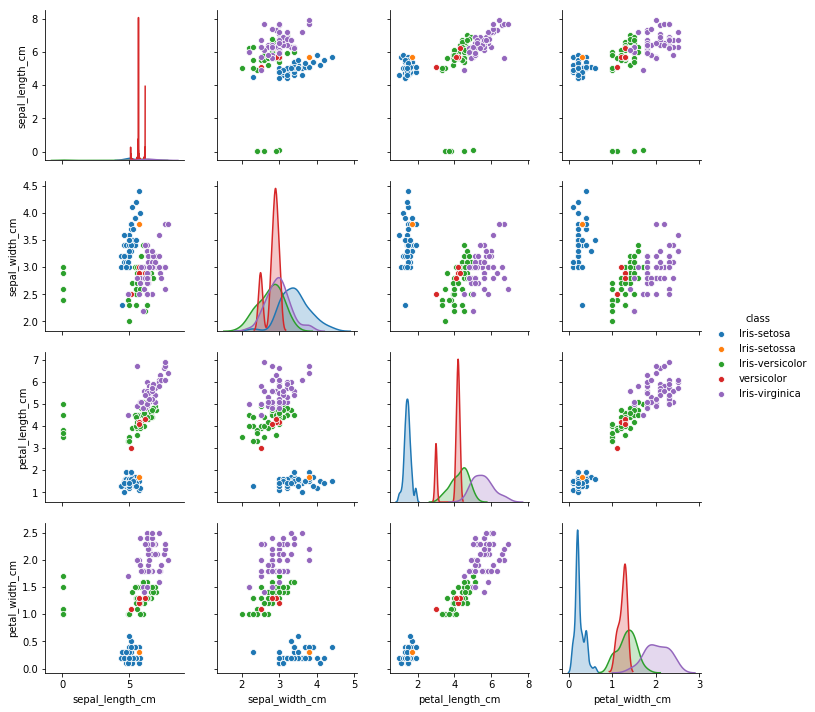

In [8]:
sns.pairplot(df1.dropna(),hue='class')

In [9]:
df['class'] = df['class'].replace('Iris-setossa','Iris-setosa')

In [10]:
df['class'] = df['class'].replace('versicolor','Iris-versicolor')

In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


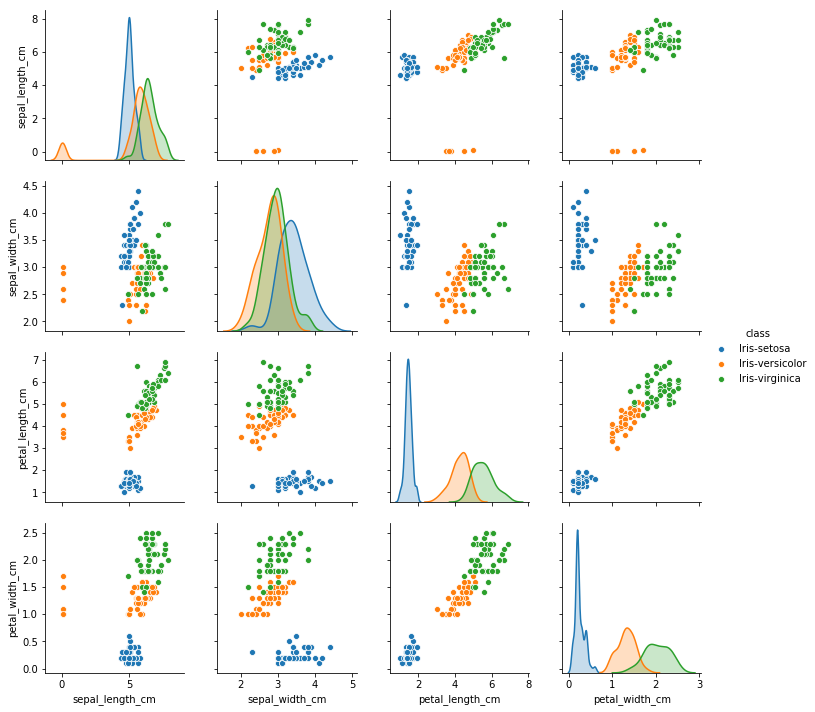

In [12]:
sns.pairplot(df.dropna(),hue='class')

In [13]:
df  = df.drop(df[(df.sepal_width_cm < 3) & (df.petal_width_cm < 0.5)].index,axis=0)

In [14]:
df[(df.sepal_width_cm < 3) & (df.petal_width_cm < 0.5)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


In [20]:
#df.loc[(df['class'] == 'Iris-versicolor') & (df.sepal_length_cm < 1) ].index['sepal_length_cm'] =  df[(df['class'] == 'Iris-versicolor') & (df.sepal_length_cm < 1) ]['sepal_length_cm']*100

In [16]:
df['sepal_length_cm'][(df['class'] == 'Iris-versicolor') & (df.sepal_length_cm < 1) ] *= 100

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.petal_width_cm.fillna(df[(df['class'] == 'Iris-setosa')]['petal_width_cm'].mean(),inplace=True)

In [ ]:
#df[(df['class'] == 'Iris-setosa')]['petal_width_cm'].mean()

In [18]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    149 non-null float64
sepal_width_cm     149 non-null float64
petal_length_cm    149 non-null float64
petal_width_cm     149 non-null float64
class              149 non-null object
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [21]:
df.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

## Model

In [23]:
ind = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm','petal_width_cm']
dv = ['class']

In [24]:
x = df[ind]
y = df[dv]

In [27]:
#splitting 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
#model training 
from sklearn.ensemble import RandomForestClassifier

In [54]:
classifier1 = RandomForestClassifier(bootstrap=False)

In [55]:
classifier1.fit(x_train,y_train)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_predict = classifier1.predict(x_test)

In [57]:
y_predict

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [37]:
#model evaluation 
from sklearn.metrics import confusion_matrix,accuracy_score
conf_mat = confusion_matrix?

In [58]:
conf_mat = confusion_matrix(y_test,y_predict)

In [59]:
conf_mat

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  5]], dtype=int64)

In [60]:
accuracy_score(y_test,y_predict)

0.9

[ 20.66191946   2.66612338  87.63219665 100.        ]


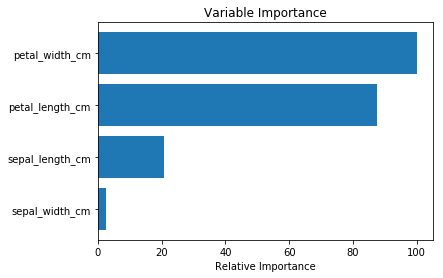

In [61]:
#Feacture Importance 
feacture_importance = classifier1.feature_importances_
feacture_importance = 100.0 *(feacture_importance / feacture_importance.max())
print(feacture_importance)
sorted_idx = np.argsort(feacture_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos,feacture_importance[sorted_idx],align='center')
plt.yticks(pos,df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [53]:
feacture_importance

array([ 18.23497   ,   3.39580293,  68.4940844 , 100.        ])

# Tuning the model 

In [62]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV


In [69]:
model = RandomForestClassifier()
parameter_grid = {
    'n_estimators':[5,10,20,50,100],
    'criterion':['gini','entropy'],
    'max_features':[1,2,3,4,]
}

cross_validation = StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

grid_search = GridSearchCV(model,param_grid=parameter_grid,cv=cross_validation)

In [71]:
start = time.time()

grid_search.fit(x_train.values,y_train.values)

end = time.time()
print(end - start) 

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation

44.161651611328125


C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [73]:
print('Best parameter :{}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best parameter :{'criterion': 'gini', 'max_features': 1, 'n_estimators': 10}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Final Model

In [74]:
y_predict_final = grid_search.predict(x_test)

In [75]:
accuracy = accuracy_score(y_test,y_predict_final)

In [76]:
accuracy

0.9

In [77]:
conf_mat_final = confusion_matrix(y_test,y_predict_final)

In [78]:
conf_mat_final

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  3,  5]], dtype=int64)